Sin Regularizacion

In [282]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [283]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot
from scipy import optimize

In [284]:
input_layer_size  = 14

num_labels = 6

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/spotify_songs-preparado.csv')

In [285]:
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

y[y == 6] = 0

m = y.size

print(X[0,:])
print(y)

[ 6.7000e+01  7.2600e-01  8.1500e-01  1.1000e+01 -4.9690e+00  1.0000e+00
  3.7300e-02  7.2400e-02  4.2100e-03  3.5700e-01  6.9300e-01  9.9972e+01
  1.6260e+05]
[1 1 1 ... 0 0 0]


In [286]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [287]:
X_norm, mu, sigma = featureNormalize(X)

In [288]:
m, n = X.shape

X = X_norm

In [289]:
rand_indices = np.random.choice(m, 6567, replace=False)
sel = X[rand_indices, :]

In [290]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

In [291]:
def sigmoid(z):

    return 1.0 / (1.0 + np.exp(-z))

In [292]:
def lrCostFunction(theta, X, y, lambda_):

    m = y.size

    if y.dtype == bool:
        y = y.astype(int)

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    temp = theta
    temp[0] = 0

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    grad = (1 / m) * (h - y).dot(X)

    grad = grad + (lambda_ / m) * temp

    return J, grad

In [293]:
def plot_cost_history(cost_history):
    pyplot.plot(cost_history)
    pyplot.xlabel('Iteración')
    pyplot.ylabel('Costo')
    pyplot.title('Historia del Costo durante el Entrenamiento')
    pyplot.show()

In [294]:
def oneVsAll(X, y, num_labels, lambda_):

    m, n = X.shape

    all_theta = np.zeros((num_labels, n + 1))

    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    cost_history = []

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 50}
        res = optimize.minimize(lrCostFunction,
                                initial_theta,
                                (X, (y == c), lambda_),
                                jac=True,
                                method='CG',
                                options=options)

        all_theta[c] = res.x
        cost_history.append(res.fun)
        plot_cost_history(cost_history)

    return all_theta

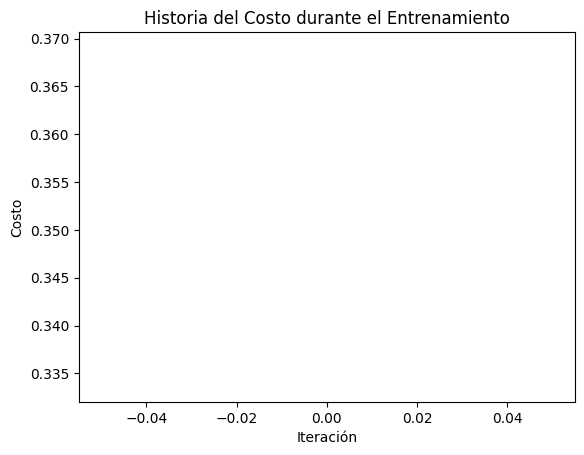

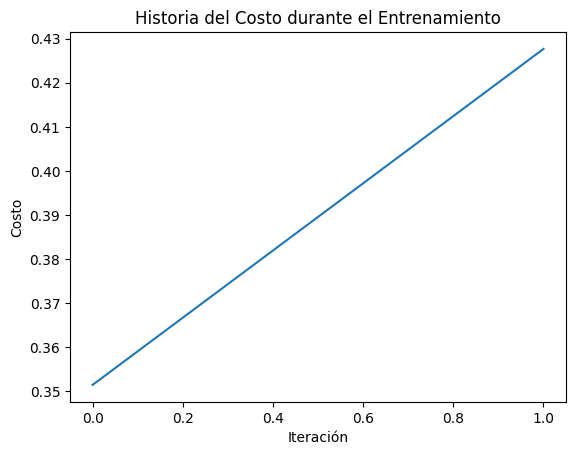

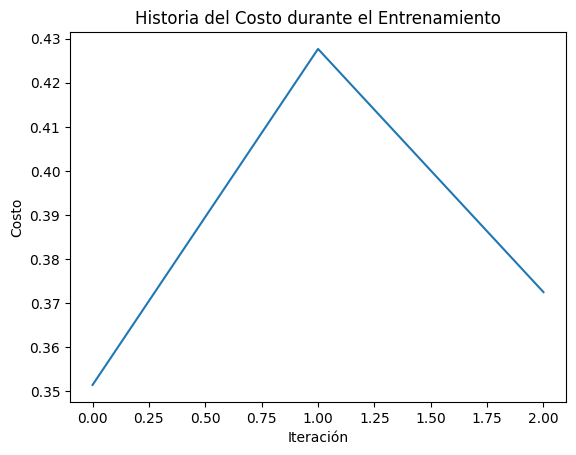

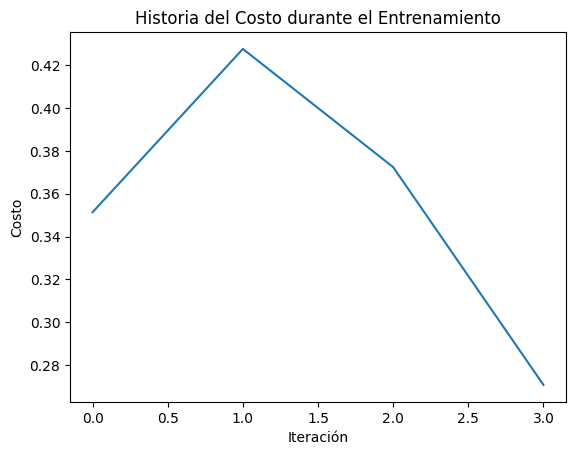

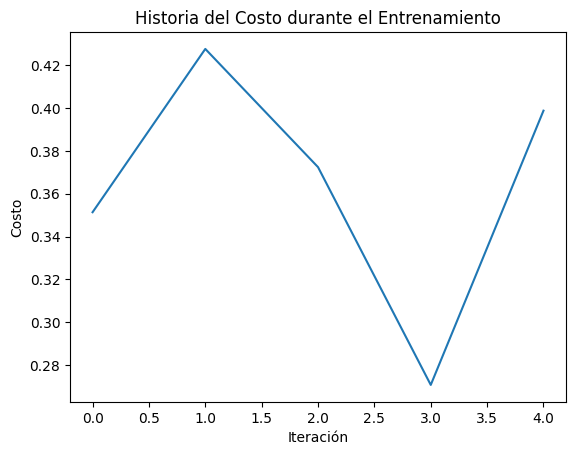

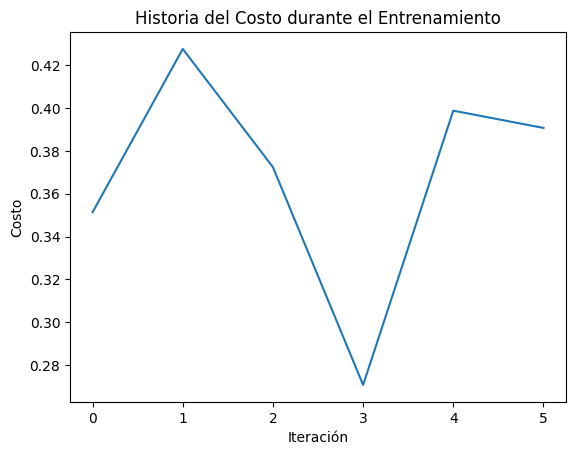

(6, 14)


In [295]:
lambda_ = 0.1
all_theta = oneVsAll(X_train, y_train, num_labels, lambda_)
print(all_theta.shape)

In [296]:
print(all_theta)
print(all_theta.size)

[[-2.07416455e+00 -2.90452309e-01  4.70074185e-01  6.34591601e-01
   4.42398332e-03  4.20238089e-01 -1.21292502e-01 -3.51912735e-01
  -3.11126223e-01  5.21049543e-01  1.04197054e-01 -7.76072996e-01
   2.18648965e-01 -1.95990918e-01]
 [-1.75875742e+00  2.19435949e-01 -9.71168748e-02 -1.29134219e-01
  -9.39937323e-03  2.27646606e-01  2.86013996e-02 -6.17932687e-01
  -5.09940729e-02 -1.32663610e-01 -9.59173218e-02  1.99962847e-03
  -3.97753369e-03 -1.91162321e-01]
 [-1.90111821e+00 -5.71681947e-02  5.41457260e-01 -3.15586387e-01
   1.43768102e-02  5.25985045e-02 -4.39541657e-02  8.54535057e-01
  -4.99198108e-02  3.35385793e-02  6.89669045e-02 -2.23904143e-01
   3.99302986e-02 -1.59635858e-01]
 [-2.93092135e+00  1.29001588e-01 -1.46736393e+00  7.73297120e-01
  -2.23363221e-02 -8.50253055e-01  2.39579243e-01 -1.16028481e+00
  -1.45408613e-01 -3.35926533e-01 -6.21154682e-02  6.48905534e-01
  -5.18251304e-02  3.15577339e-01]
 [-1.89377731e+00  1.44532705e-01  4.92456643e-01  1.69475642e-01
  

In [297]:
def predictOneVsAll(all_theta, X):

    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)

    return p

In [298]:
print(X_train.shape)
pred = predictOneVsAll(all_theta, X_train)
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y_train) * 100))
XPrueba = X_test

(26265, 13)
Precision del conjuto de entrenamiento: 47.01%


In [299]:
XPrueba = np.concatenate([np.ones((XPrueba.shape[0], 1)), XPrueba], axis=1)
print(XPrueba.shape)
p = np.argmax(sigmoid(XPrueba.dot(all_theta.T)), axis = 1)
print(p)

(6567, 14)
[3 4 0 ... 2 2 3]


In [300]:
print(y_test)

predicciones_prueba = predictOneVsAll(all_theta, X_test)

precision_prueba = np.mean(predicciones_prueba == y_test) * 100
print('Precisión en el conjunto de prueba: {:.2f}%'.format(precision_prueba))

[1 4 1 ... 2 2 1]
Precisión en el conjunto de prueba: 47.05%


Con Regularizacion:

In [301]:
def lrCostFunctionReg(theta, X, y, lambda_):

    m = y.size

    if y.dtype == bool:
        y = y.astype(int)

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    temp = theta
    temp[0] = 0

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    grad = (1 / m) * (h - y).dot(X)

    grad = grad + (lambda_ / m) * temp

    return J, grad

In [302]:
def oneVsAllReg(X, y, num_labels, lambda_):

    m, n = X.shape

    all_theta = np.zeros((num_labels, n + 1))

    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    cost_history = []

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 50}
        res = optimize.minimize(lrCostFunctionReg,
                                initial_theta,
                                (X, (y == c), lambda_),
                                jac=True,
                                method='CG',
                                options=options)

        all_theta[c] = res.x
        cost_history.append(res.fun)
        plot_cost_history(cost_history)

    return all_theta

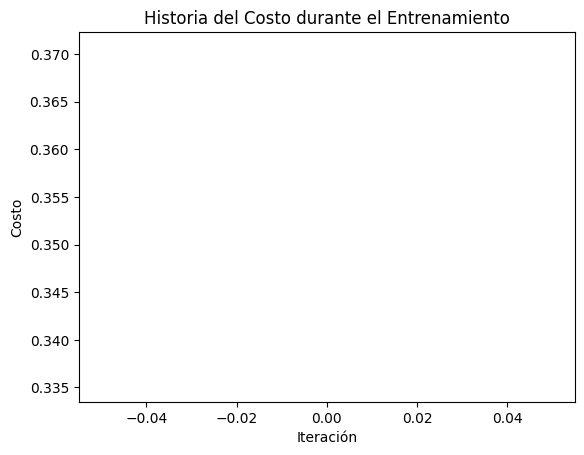

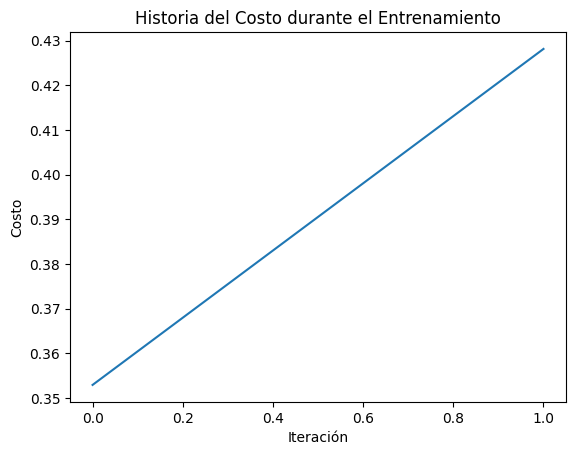

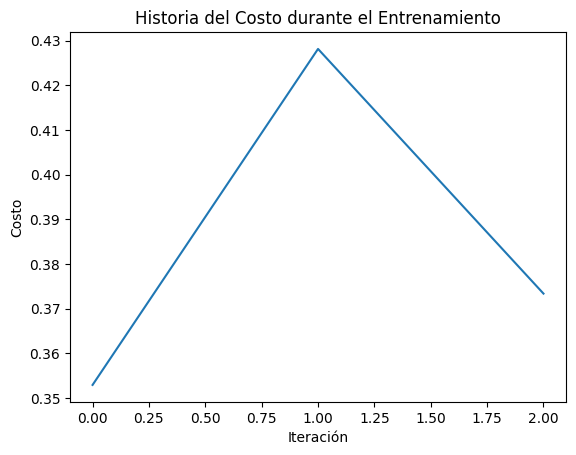

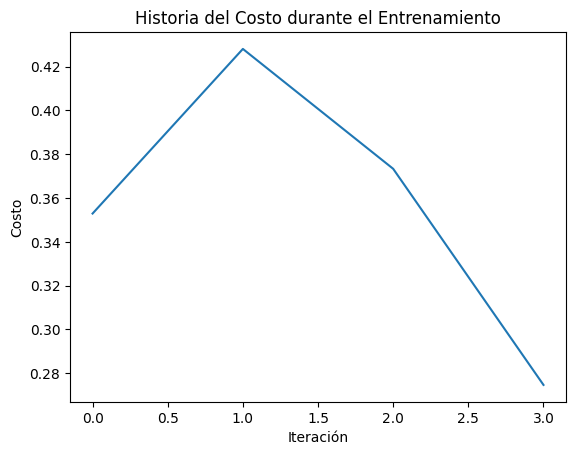

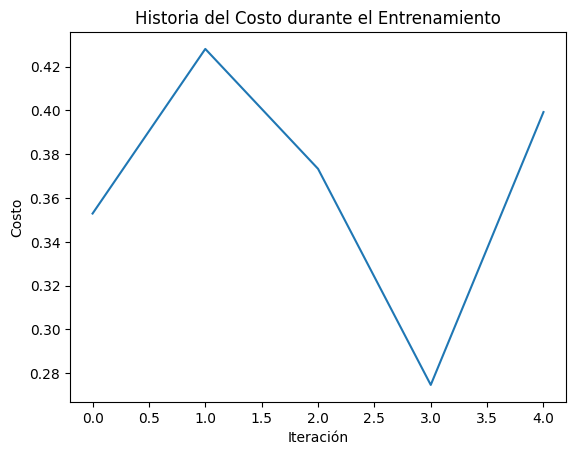

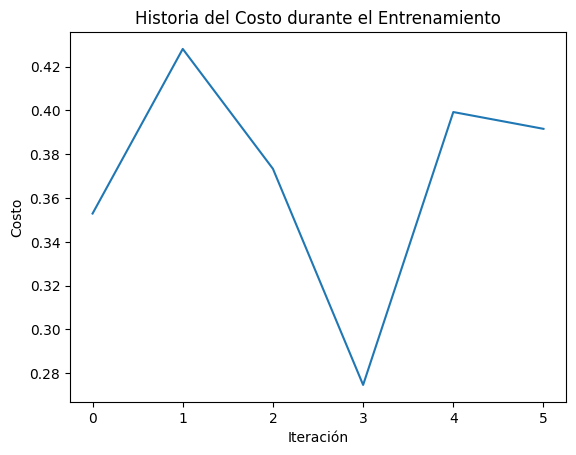

(6, 14)


In [303]:
lambda_ = 40
all_theta_reg = oneVsAllReg(X_train, y_train, num_labels, lambda_)
print(all_theta_reg.shape)

In [304]:
print(all_theta_reg)
print(all_theta_reg.size)

[[-2.05538397e+00 -2.86079201e-01  4.49547071e-01  6.15164355e-01
   4.11791214e-03  4.16451486e-01 -1.19111461e-01 -3.39686878e-01
  -3.10467546e-01  5.16114638e-01  1.02368564e-01 -7.55731300e-01
   2.11243263e-01 -1.90872209e-01]
 [-1.75229381e+00  2.17955560e-01 -9.63212157e-02 -1.21905755e-01
  -9.44022764e-03  2.20337684e-01  2.88574380e-02 -6.00877294e-01
  -4.86023964e-02 -1.31543044e-01 -9.52391533e-02  6.29404070e-04
  -4.71056234e-03 -1.87984235e-01]
 [-1.89300991e+00 -5.47879621e-02  5.31875305e-01 -3.06177879e-01
   1.41420941e-02  4.61984740e-02 -4.37695890e-02  8.45299086e-01
  -4.74747846e-02  3.16471533e-02  6.68977533e-02 -2.18307378e-01
   3.84959517e-02 -1.57756104e-01]
 [-2.82874636e+00  1.19355327e-01 -1.40829694e+00  7.05902541e-01
  -2.20898356e-02 -7.96633362e-01  2.35995138e-01 -1.05718658e+00
  -1.51664592e-01 -3.13465365e-01 -5.57064117e-02  6.23018609e-01
  -4.31718741e-02  3.10489864e-01]
 [-1.88808124e+00  1.43325335e-01  4.82055819e-01  1.61199114e-01
  

In [305]:
pred_reg = predictOneVsAll(all_theta_reg, X_train)
print('Precision del conjuto de entrenamiento con regularización: {:.2f}%'.format(np.mean(pred_reg == y_train) * 100))

Precision del conjuto de entrenamiento con regularización: 47.03%


In [306]:
predicciones_prueba_reg = predictOneVsAll(all_theta_reg, X_test)

In [307]:
precision_prueba_reg = np.mean(predicciones_prueba_reg == y_test) * 100
print('Precisión en el conjunto de prueba con regularización: {:.2f}%'.format(precision_prueba_reg))

Precisión en el conjunto de prueba con regularización: 47.10%


En la implementación con regularización, se agregaron términos de regularización a las funciones de costo y gradiente. Esto se hizo para evitar el sobreajuste del modelo a los datos de entrenamiento. Se ajustó el parámetro de regularización lambda para controlar el efecto de la regularización en el modelo. También se realizaron pruebas en el conjunto de datos de prueba para evaluar la precisión del modelo regularizado.

Se observó que los resultados de precisión obtenidos con ambas implementaciones fueron iguales. Esto podría deberse a varios factores, como un parámetro de regularización demasiado pequeño, poca sensibilidad a la regularización o la falta de necesidad de regularización debido a la naturaleza de los datos